<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Overfitting

## Objetivos de la clase

* Aprender conceptos básicos de overfitting y underfitting en los modelos de machine learning. 


## Contenidos

* [Overfitting y underfitting](#c1)


<a id='c1'></a>
## I.- Overfitting y underfitting



### 1.- Introducción

### Overfitting
El overfitting ocurre cuando el algoritmo de machine learning captura el ruido de los datos. Intuitivamente, el overfitting ocurre cuando el modelo o el algoritmo se ajusta demasiado bien a los datos. Específicamente, el sobreajuste ocurre si el modelo o algoritmo muestra un sesgo bajo pero una varianza alta. 


El overfitting a menudo es el resultado de un modelo excesivamente complicado, y puede evitarse ajustando múltiples modelos y utilizando validación o validación cruzada para comparar sus precisiones predictivas en los datos de prueba.

<img src="https://miro.medium.com/max/578/1*Di7rY6ALXtkhlmlcKRSCoA.png
" width="360" height="240" align="left"/>
<img src="https://miro.medium.com/max/578/1*QzA45ATjeEbwv5f1G99GnQ.png
" width="360" height="240" align="rigt"/>

### Underfitting

El underfitting ocurre cuando un modelo estadístico o un algoritmo de machine learning no pueden capturar la tendencia subyacente de los datos. Intuitivamente, el underfitting ocurre cuando el modelo o el algoritmo no se ajustan suficientemente a los datos. Específicamente, el underfitting ocurre si el modelo o algoritmo muestra una varianza baja pero un sesgo alto.

El underfitting suele ser el resultado de un modelo excesivamente simple.

<img src="https://miro.medium.com/max/578/1*kZfqaD6hl9iYGYXkMwV-JA.png
" width="360" height="240" align="left"/>
<img src="https://miro.medium.com/max/578/1*2RXJ2O-_c2ukaq5p-WQ9tQ.png
" width="360" height="240" align="rigt"/>


### ¿Cómo escoger el mejor modelo?

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171229/overfitting_1.png" width="560" height="560" align="center"/>


* El sobreajuste va a estar relacionado con la complejidad del modelo, mientras más complejidad le agreguemos, mayor va a ser la tendencia a sobreajuste a los datos.


* No existe una regla general para establecer cual es el nivel ideal de complejidad que le podemos otorgar a nuestro modelo sin caer en el sobreajuste; pero podemos valernos de algunas herramientas analíticas para intentar entender como el modelo se ajusta a los datos y reconocer el sobreajuste. 


Para entender esto, veamos un ejemplo con el método de **árboles de decisiones**. Los árboles de decisión (**DT**) son un método de aprendizaje supervisado no paramétrico utilizado para la clasificación y la regresión.

###  2.- Ejemplo con  Árboles de Decisión 

<img src="https://miro.medium.com/max/1680/0*DKVni_-q7dAKVel7.png" width="480" height="560" align="center"/>



Los [Árboles de Decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) pueden ser muchas veces una herramienta muy precisa, pero también con mucha tendencia al sobreajuste. Para construir estos modelos aplicamos un procedimiento recursivo para encontrar los atributos que nos proporcionan más información sobre distintos subconjuntos de datos, cada vez más pequeños. 

Si aplicamos este procedimiento en forma reiterada, eventualmente podemos llegar a un árbol en el que cada *hoja* tenga una sola instancia de nuestra variable objetivo a clasificar. 

En este caso extremo, el Árbol de Decisión va a tener una pobre *generalización* y estar bastante sobreajustado; ya que cada instancia de los datos de entrenamiento va a encontrar el camino que lo lleve eventualmente a la hoja que lo contiene, alcanzando así una precisión del 100% con los datos de entrenamiento. 

### a) Ejemplo función sinusoidal

Veamos un ejemplo sencillo con la ayuda de python, tratemos de ajustar un modelo de **DT** sobre una función senusoidal.

In [9]:
# librerias 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import random

random.seed(1982) # semilla

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (12, 4)})

In [10]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# separ los datos en train y eval
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)

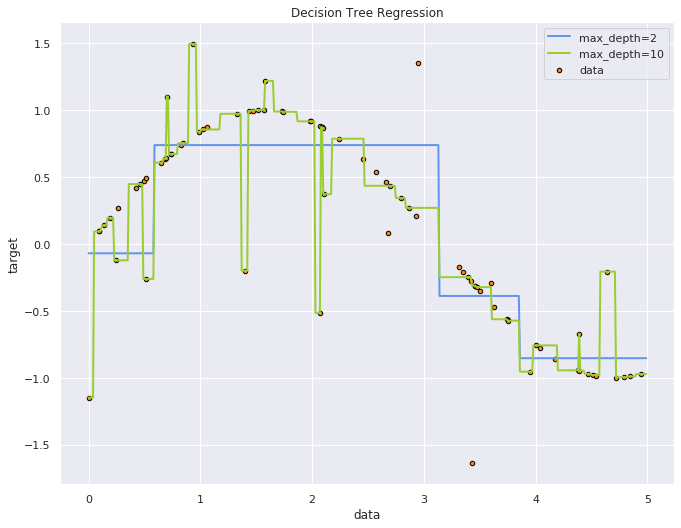

In [11]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)

regr_1.fit(x_train,y_train)
regr_2.fit(x_train,y_train)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_1.predict(X_test)

# Plot the results
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Basado en los gráficos, el modelo de **DT** con profundidad 2, no se ajuste muy bien a los datos, mientras que el modelo **DT** con profundidad 10 se ajuste excesivamente demasiado a ellos. 

Para ver el ajuste de cada modelo, estudiaremos su precisión (**score**) sobre los conjunto de entrenamiento y de testeo.

In [12]:
result  = pd.DataFrame({
    
    'model': ['dt_depth_2','dt_depth_10'],
    'train_score': [ regr_1.score(x_train, y_train), regr_2.score(x_train, y_train)],
    'test_score': [ regr_1.score(x_eval, y_eval), regr_2.score(x_eval, y_eval)]
})
result

,model,train_score,test_score
0,dt_depth_2,0.766363,0.719137
1,dt_depth_10,1.000000,0.661186


Como es de esperar, para el modelo **DT** con profundidad 10, la precisión sobre el conjunto de entrenamiento es perfecta (igual a 1), no obstante, esta disminuye considerablemente al obtener la presición sobre los datos de testeo (igual a 0.66), por lo que esto es una evidencia para decir que el modelo tiene **overfitting**.

Caso contrario es el modelo  **DT** con profundidad 2, puesto que es un caso típico de **underfitting**. Cabe destacar que el modelo de underfitting tiene una presición similar tanto para el conjunto de entrenamiento como para el conjunto de testo.

### Conclusiones del caso

Ambos modelos no ajuste de la mejor manera, pero lo hacen de distintas perspectivas. Se debe poner mucho énfasis al momento de separar el conjunto de entrenamiento y de testeo, puesto que los resultados se pueden ver altamente sesgado (caso del overfitting). Particularmente para este caso, el ajuste era complejo de realizar puesto que eliminabamos un monto de datos "significativos", que hacian que los modelos no captarán la continuidad de la función sinusoidal.


### Equilibrio en el ajuste de modelos


A continuación ocuparemos otro conjunto de entrenamientos (**make_classification**) para mostrar una forma de encoentrar un un equilibrio en la complejidad del modelo y su *ajuste* a los datos.

Siguiendo con el ejemplo de los modelos de **árbol de decisión**, analizaremos la presición (**score**) para distintas profundidades sobre los distintos conjuntos (entrenamiento y testeo).


In [13]:
# Ejemplo en python - árboles de decisión
# dummy data con 100 atributos y 2 clases
X, y = make_classification(10000, 100, n_informative=3, n_classes=2,
                          random_state=1982)

# separ los datos en train y eval
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)

# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 20))

# Entrenar con arboles de distinta profundidad
for deep in max_deep_list:
    model = DecisionTreeClassifier( max_depth=deep)
    model.fit(x_train, y_train)
    train_prec.append(model.score(x_train, y_train))
    eval_prec.append(model.score(x_eval, y_eval))

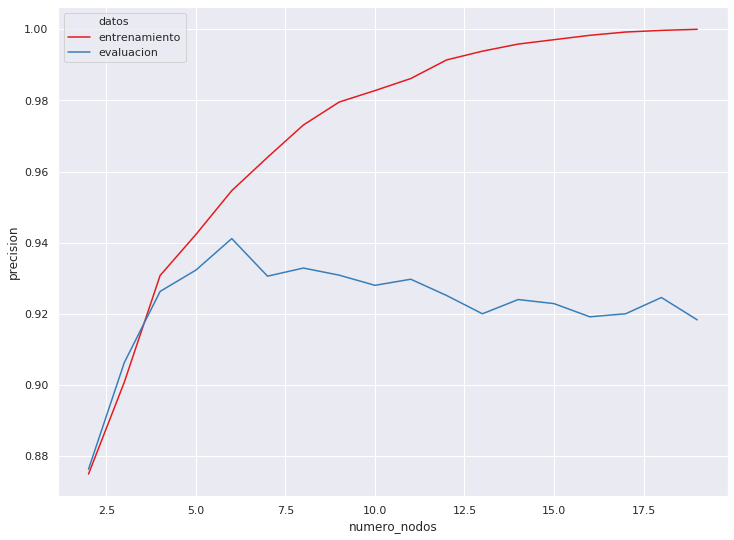

In [6]:
# graficar los resultados.

sns.set(rc={'figure.figsize':(12,9)})

df1 = pd.DataFrame({'numero_nodos':max_deep_list,
                   'precision':train_prec,
                   'datos':'entrenamiento'})

df2 = pd.DataFrame({'numero_nodos':max_deep_list,
                   'precision':eval_prec,
                   'datos':'evaluacion'})

df_graph = pd.concat([df1,df2])

sns.lineplot(data=df_graph,
             x='numero_nodos',
             y='precision',
             hue='datos',
             palette="Set1")

El gráfico que acabamos de construir se llama **gráfico de ajuste** y muestra la precisión del modelo en función de su complejidad. 

El punto con mayor precisión, en los datos de evaluación, lo obtenemos con un nivel de profundidad de aproximadamente 6 nodos; a partir de allí el modelo pierde en *generalización* y comienza a estar sobreajustado. 

También podemos crear un gráfico similar con la ayuda de Scikit-learn, utilizando `validation_curve`.

In [7]:
# utilizando validation curve de sklearn
from sklearn.model_selection import validation_curve

train_prec, eval_prec = validation_curve(estimator=model, X=x_train,
                                        y=y_train, param_name='max_depth',
                                        param_range=max_deep_list, cv=5)

train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

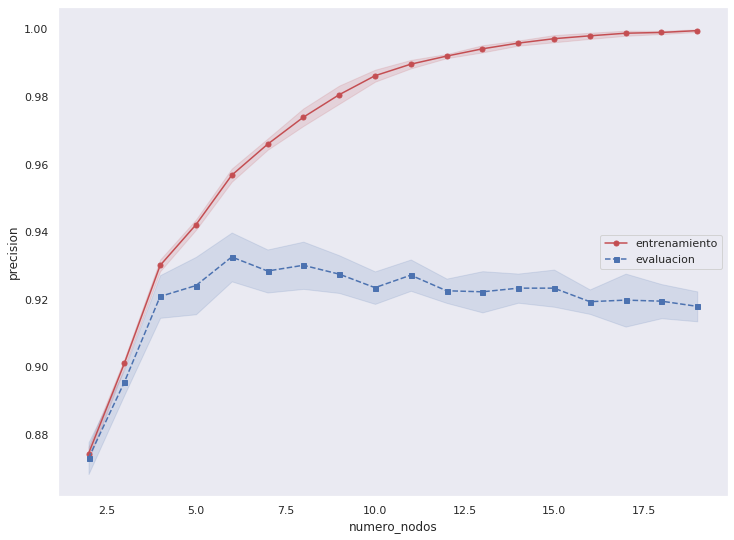

In [8]:
# graficando las curvas
plt.plot(max_deep_list, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(max_deep_list, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(max_deep_list, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(max_deep_list, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('numero_nodos')
plt.ylabel('precision')
plt.show()

## Referencia

1. [Underfitting vs Underfitting](https://scikit-learn.org/0.15/auto_examples/plot_underfitting_overfitting.html)
2. [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)
